In [ ]:
## Connect to gg drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/Coconut-Mature-Classification-Final

/content/drive/MyDrive/Coconut-Mature-Classification-Final


## 1. EDA and Data Preprocessing

In [ ]:
# import os
# import shutil
# import random

# # Đường dẫn đến thư mục chứa dữ liệu hình ảnh
# data_dir = '/content/drive/.shortcut-targets-by-id/1HvKsQz_kawTxU0oxq_tOAwR0xJkB5XMs/dataset/mature_processed'

# # Đường dẫn đến thư mục chứa tập dữ liệu huấn luyện, kiểm tra và kiểm định
# train_dir = '/content/drive/MyDrive/ColabNotebooks/coconut_project/train/mature'
# val_dir = '/content/drive/MyDrive/ColabNotebooks/coconut_project/val/mature'
# test_dir = '/content/drive/MyDrive/ColabNotebooks/coconut_project/test/mature'

# # Tạo thư mục nếu chưa tồn tại
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Lấy danh sách tất cả các tệp hình ảnh trong thư mục dữ liệu
# image_files = os.listdir(data_dir)

# # Xáo trộn danh sách tệp hình ảnh
# random.shuffle(image_files)

# # Tính số lượng tệp cho mỗi phần
# total_images = len(image_files)
# train_split = int(0.8 * total_images)
# val_split = int(0.1 * total_images)

# # Chia tệp hình ảnh thành các phần
# train_files = image_files[:train_split]
# val_files = image_files[train_split:train_split + val_split]
# test_files = image_files[train_split + val_split:]

# # Di chuyển các tệp hình ảnh vào các thư mục tương ứng
# for file in train_files:
#     src = os.path.join(data_dir, file)
#     dst = os.path.join(train_dir, file)
#     shutil.copy(src, dst)

# for file in val_files:
#     src = os.path.join(data_dir, file)
#     dst = os.path.join(val_dir, file)
#     shutil.copy(src, dst)

# for file in test_files:
#     src = os.path.join(data_dir, file)
#     dst = os.path.join(test_dir, file)
#     shutil.copy(src, dst)

# print("Finished")

Finished


In [ ]:
import os
import plotly.express as px

base_folder = '/content/drive/MyDrive/Coconut-Mature-Classification-Final'
data_sets = ['train', 'test', 'val']
data = {'Set': [], 'Class': [], 'Number of images': []}

for data_set in data_sets:
    dataset_folder = os.path.join(base_folder, data_set)

    for class_folder in os.listdir(dataset_folder):
        class_path = os.path.join(dataset_folder, class_folder)
        if os.path.isdir(class_path):
            data['Set'].append(data_set)
            data['Class'].append(class_folder)
            data['Number of images'].append(len(os.listdir(class_path)))

fig = px.bar(data, x='Class', y='Number of images', color='Set',
             title='Class distribution')
fig.show()

In [ ]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import torch.optim as optim
from glob import glob
from tqdm import tqdm
import random
from torch.utils.data import DataLoader

In [ ]:
# import imgaug.augmenters as iaa
# import cv2

# # Define the augmentation pipeline
# augmentation = iaa.Sequential([
#     iaa.Fliplr(0.5),
#     iaa.Affine(rotate=(-20, 20), mode='reflect')
# ])

# # Define input and output directories
# input_dir = '/content/drive/MyDrive/ColabNotebooks/coconut_project/train/young'
# output_dir = '/content/drive/MyDrive/ColabNotebooks/coconut_project/train/young_augmented'

# # Create the output directory if it doesn't exist
# os.makedirs(output_dir, exist_ok=True)

# # List all image files in the input directory
# image_files = [f for f in os.listdir(input_dir) if f.endswith('.jpg')]

# # Perform data augmentation for each image in the input directory
# for filename in image_files:
#     # Load an image
#     image = cv2.imread(os.path.join(input_dir, filename))
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image to RGB format

#     # Create an empty list to store augmented images
#     augmented_images = []

#     # Perform data augmentation and generate 4 different augmentations for each image
#     for _ in range(4):
#         augmented_image = augmentation.augment_image(image)
#         augmented_images.append(augmented_image)

#     # Save augmented images to the output directory
#     for i, augmented_image in enumerate(augmented_images):
#         output_filename = f'augmented_{i}_{filename}'
#         output_path = os.path.join(output_dir, output_filename)
#         augmented_image_bgr = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)
#         cv2.imwrite(output_path, augmented_image_bgr)

# print("Augmentation complete.")

Augmentation complete.


In [ ]:
folder_path = '/content/drive/MyDrive/Coconut-Mature-Classification-Final/train/dua non'
files = os.listdir(folder_path)
num_files = len(files)
print(f"Number of files in the folder: {num_files}")

Number of files in the folder: 816


In [ ]:
# source_folder = '/content/drive/MyDrive/ColabNotebooks/coconut_project/train/young_augmented'
# destination_folder = '/content/drive/MyDrive/ColabNotebooks/coconut_project/train/young'

# # Get a list of all files in the source folder
# files = os.listdir(source_folder)

# # Loop through the files and move each one to the destination folder
# for file in files:
#     source_file = os.path.join(source_folder, file)
#     destination_file = os.path.join(destination_folder, file)
#     shutil.move(source_file, destination_file)

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


train_data = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/Coconut-Mature-Classification-Final/train', transform=train_transforms)
val_data = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/Coconut-Mature-Classification-Final/val', transform=val_transforms)

In [ ]:
num_classes = len(train_data.classes)
classes_name = train_data.classes
classes2idx = train_data.class_to_idx

print(f"Number of classes: {num_classes}")
print(f"Classes names: {classes_name}")
print(f"Labels mapping: {classes2idx}")
print("Number of train: ", len(train_data))
print("Number of val: ", len(val_data))

Number of classes: 3
Classes names: ['dua gia', 'dua nao', 'dua non']
Labels mapping: {'dua gia': 0, 'dua nao': 1, 'dua non': 2}
Number of train:  2548
Number of val:  321


run: 100%|██████████| 3/3 [00:00<00:00, 52.46it/s]


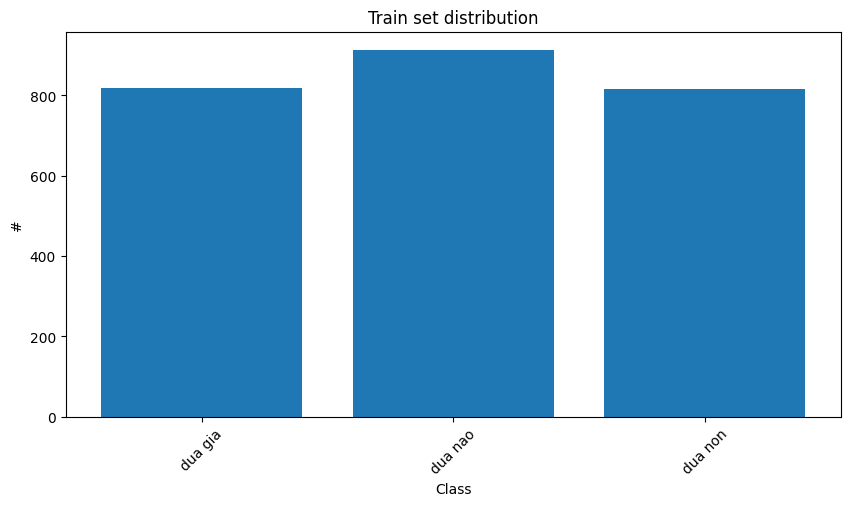

In [ ]:
all_class = glob("/content/drive/MyDrive/Coconut-Mature-Classification-Final/train/*")
train_class_counts =  {}
for folder_class in tqdm(all_class, desc='run'):
    name = folder_class.split('/')[-1]
    train_class_counts[name] = len(glob(f"{folder_class}/*"))
train_class_counts = dict(sorted(train_class_counts.items(), key=lambda item: item[0]))

plt.figure(figsize=(10, 5))
plt.bar(list(train_class_counts.keys()), list(train_class_counts.values()))
plt.title('Train set distribution')
plt.xlabel('Class')
plt.ylabel('#')
plt.xticks(rotation=45)
plt.show()

run: 100%|██████████| 3/3 [00:00<00:00, 400.92it/s]


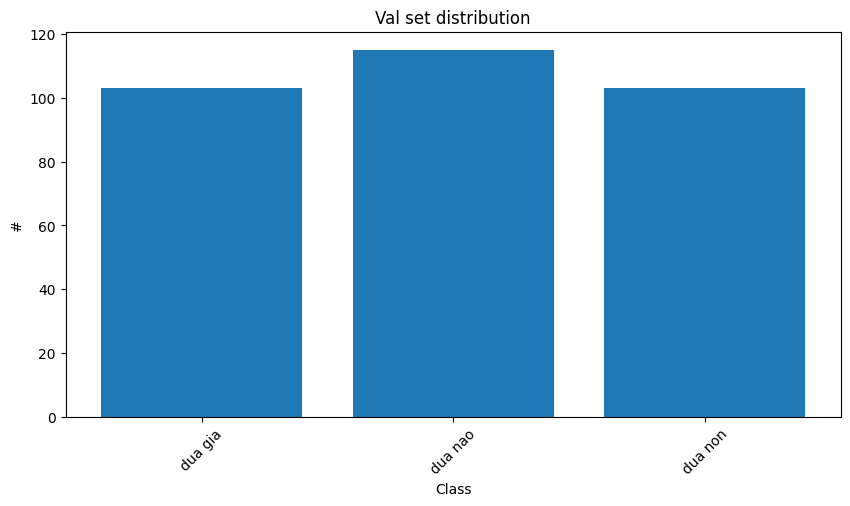

In [ ]:
all_class = glob("/content/drive/MyDrive/Coconut-Mature-Classification-Final/test/*")
train_class_counts =  {}
for folder_class in tqdm(all_class, desc='run'):
    name = folder_class.split('/')[-1]
    train_class_counts[name] = len(glob(f"{folder_class}/*"))
train_class_counts = dict(sorted(train_class_counts.items(), key=lambda item: item[0]))

plt.figure(figsize=(10, 5))
plt.bar(list(train_class_counts.keys()), list(train_class_counts.values()))
plt.title('Val set distribution')
plt.xlabel('Class')
plt.ylabel('#')
plt.xticks(rotation=45)
plt.show()

## 2. Modeling

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

In [ ]:
import torch.nn as nn
import torchvision.models as models

# Load Densenet-121 model
model = models.densenet121(pretrained=True)  # Sử dụng pretrained weights hoặc pretrained=False nếu không muốn

num_classes = 3
model.classifier = nn.Linear(model.classifier.in_features, num_classes)

for param in model.features.parameters():
    param.requires_grad = False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.



In [ ]:
random_image = torch.rand(1, 3, 224, 224)
model(random_image).shape

torch.Size([1, 3])

In [ ]:
print("# Parameters", sum(p.numel() for p in model.parameters()))

# Parameters 6956931


## 3. Training model

In [ ]:
import torch.optim as optim
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
EPOCHS = 30
BATCH_SIZE = 64

# Create data loaders
TRAINLOADER = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
TESTLOADER = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
DEVICE

device(type='cuda')

In [ ]:
model.to(DEVICE)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
!pip install lion-pytorch
from lion_pytorch import Lion

In [ ]:
# Loss
criterion = nn.CrossEntropyLoss()
# Optimizer and Scheduler
optimizer = Lion(model.parameters(), lr=1e-4, weight_decay=1e-2)

In [ ]:
# Define a filename for saving the model
model_save_path = 'densenet121_model.pt'

# Define early stopping parameters
patience = 5
best_validation_loss = float('inf')
no_improvement_count = 0

loss_train = []
loss_test = []
f1_train = []
f1_test = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    predictions_train = []
    true_labels_train = []

    for i, data in tqdm(enumerate(TRAINLOADER), desc='train'):
        inputs, labels = data
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        predictions_train.extend(predicted.tolist())
        true_labels_train.extend(labels.tolist())

    train_loss = running_loss / len(TRAINLOADER)
    train_f1 = f1_score(true_labels_train, predictions_train, average='weighted')

    loss_train.append(train_loss)
    f1_train.append(train_f1)

    model.eval()
    test_loss_val = 0.0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for data in TESTLOADER:
            # Validation steps as in your code
            inputs, labels = data
            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss_val += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.tolist())
            true_labels.extend(labels.tolist())

    test_loss_val /= len(TESTLOADER)
    test_f1_val = f1_score(true_labels, predictions, average='weighted')

    loss_test.append(test_loss_val)
    f1_test.append(test_f1_val)
    print(f'Epoch [{epoch + 1}/{EPOCHS}]  - Train Loss: {train_loss:.4f} - Train F1: {train_f1:.4f} - Test Loss: {test_loss_val:.4f} - Test F1: {test_f1_val:.4f}')

    # Check if validation loss has improved
    if test_loss_val < best_validation_loss:
        best_validation_loss = test_loss_val
        no_improvement_count = 0

        # Save the model when validation loss improves
        torch.save(model.state_dict(), model_save_path)
    else:
        no_improvement_count += 1

    # If no improvement for 'early_stopping_patience' epochs, stop training
    if no_improvement_count >= patience:
        print(f'Early stopping after {epoch + 1} epochs due to no improvement in validation loss.')
        break

print('Finished Training')

train: 40it [13:53, 20.84s/it]


Epoch [1/30]  - Train Loss: 1.0101 - Train F1: 0.5135 - Test Loss: 0.8664 - Test F1: 0.6578


train: 40it [01:41,  2.55s/it]


Epoch [2/30]  - Train Loss: 0.7548 - Train F1: 0.8068 - Test Loss: 0.6338 - Test F1: 0.8813


train: 40it [01:39,  2.49s/it]


Epoch [3/30]  - Train Loss: 0.5700 - Train F1: 0.9029 - Test Loss: 0.4847 - Test F1: 0.9215


train: 40it [01:39,  2.49s/it]


Epoch [4/30]  - Train Loss: 0.4344 - Train F1: 0.9255 - Test Loss: 0.3734 - Test F1: 0.9279


train: 40it [01:38,  2.47s/it]


Epoch [5/30]  - Train Loss: 0.3386 - Train F1: 0.9370 - Test Loss: 0.2926 - Test F1: 0.9341


train: 40it [01:39,  2.48s/it]


Epoch [6/30]  - Train Loss: 0.2710 - Train F1: 0.9421 - Test Loss: 0.2339 - Test F1: 0.9406


train: 40it [01:40,  2.50s/it]


Epoch [7/30]  - Train Loss: 0.2258 - Train F1: 0.9511 - Test Loss: 0.1921 - Test F1: 0.9497


train: 40it [01:39,  2.49s/it]


Epoch [8/30]  - Train Loss: 0.1919 - Train F1: 0.9531 - Test Loss: 0.1618 - Test F1: 0.9466


train: 40it [01:39,  2.48s/it]


Epoch [9/30]  - Train Loss: 0.1653 - Train F1: 0.9519 - Test Loss: 0.1369 - Test F1: 0.9654


train: 40it [01:40,  2.52s/it]


Epoch [10/30]  - Train Loss: 0.1470 - Train F1: 0.9603 - Test Loss: 0.1190 - Test F1: 0.9623


train: 40it [01:42,  2.56s/it]


Epoch [11/30]  - Train Loss: 0.1261 - Train F1: 0.9642 - Test Loss: 0.1033 - Test F1: 0.9655


train: 40it [01:43,  2.58s/it]


Epoch [12/30]  - Train Loss: 0.1096 - Train F1: 0.9685 - Test Loss: 0.0944 - Test F1: 0.9686


train: 40it [01:42,  2.56s/it]


Epoch [13/30]  - Train Loss: 0.1028 - Train F1: 0.9697 - Test Loss: 0.0834 - Test F1: 0.9718


train: 40it [01:43,  2.59s/it]


Epoch [14/30]  - Train Loss: 0.0924 - Train F1: 0.9721 - Test Loss: 0.0755 - Test F1: 0.9718


train: 40it [01:42,  2.56s/it]


Epoch [15/30]  - Train Loss: 0.0883 - Train F1: 0.9748 - Test Loss: 0.0723 - Test F1: 0.9686


train: 40it [01:44,  2.61s/it]


Epoch [16/30]  - Train Loss: 0.0752 - Train F1: 0.9811 - Test Loss: 0.0628 - Test F1: 0.9844


train: 40it [01:43,  2.58s/it]


Epoch [17/30]  - Train Loss: 0.0724 - Train F1: 0.9768 - Test Loss: 0.0585 - Test F1: 0.9875


train: 40it [01:44,  2.60s/it]


Epoch [18/30]  - Train Loss: 0.0627 - Train F1: 0.9839 - Test Loss: 0.0561 - Test F1: 0.9813


train: 40it [01:41,  2.53s/it]


Epoch [19/30]  - Train Loss: 0.0613 - Train F1: 0.9843 - Test Loss: 0.0499 - Test F1: 0.9907


train: 40it [01:40,  2.51s/it]


Epoch [20/30]  - Train Loss: 0.0580 - Train F1: 0.9851 - Test Loss: 0.0524 - Test F1: 0.9844


train: 40it [01:40,  2.51s/it]


Epoch [21/30]  - Train Loss: 0.0550 - Train F1: 0.9902 - Test Loss: 0.0454 - Test F1: 0.9907


train: 40it [01:41,  2.53s/it]


Epoch [22/30]  - Train Loss: 0.0474 - Train F1: 0.9882 - Test Loss: 0.0441 - Test F1: 0.9907


train: 5it [00:12,  2.53s/it]

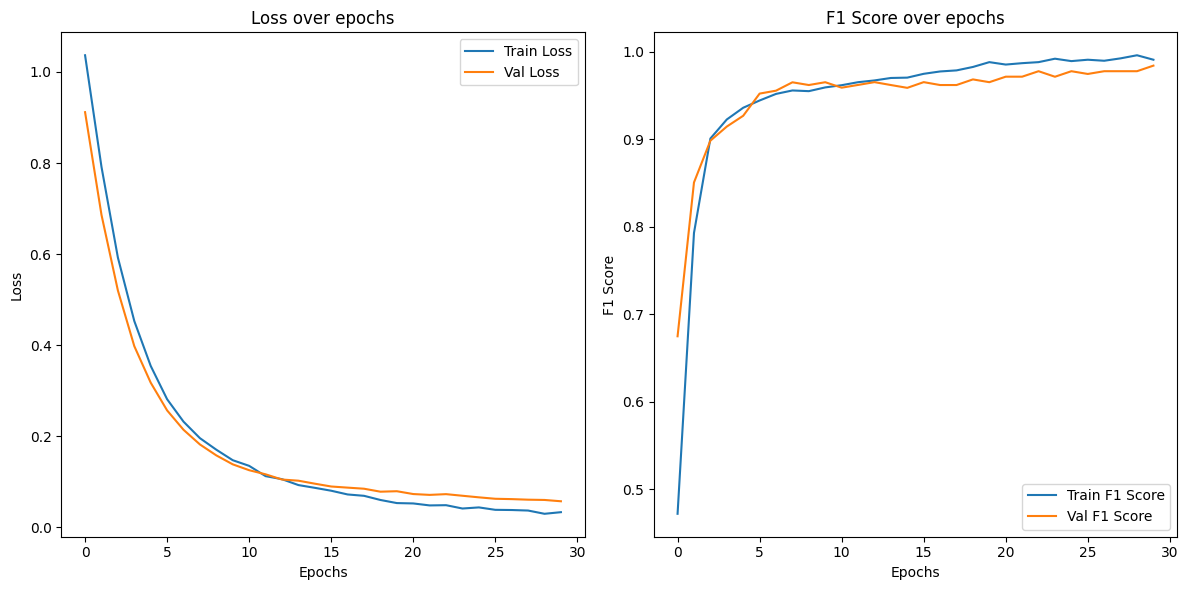

In [ ]:
# Plotting the metrics
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss_train, label='Train Loss')
plt.plot(loss_test, label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(f1_train, label='Train F1 Score')
plt.plot(f1_test, label='Val F1 Score')
plt.title('F1 Score over epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

## 4. Evaluating

In [ ]:
model = models.densenet121(num_classes=3)
model.load_state_dict(torch.load("/content/drive/MyDrive/Coconut-Mature-Classification-Final/densenet121_model.pt"))

<All keys matched successfully>

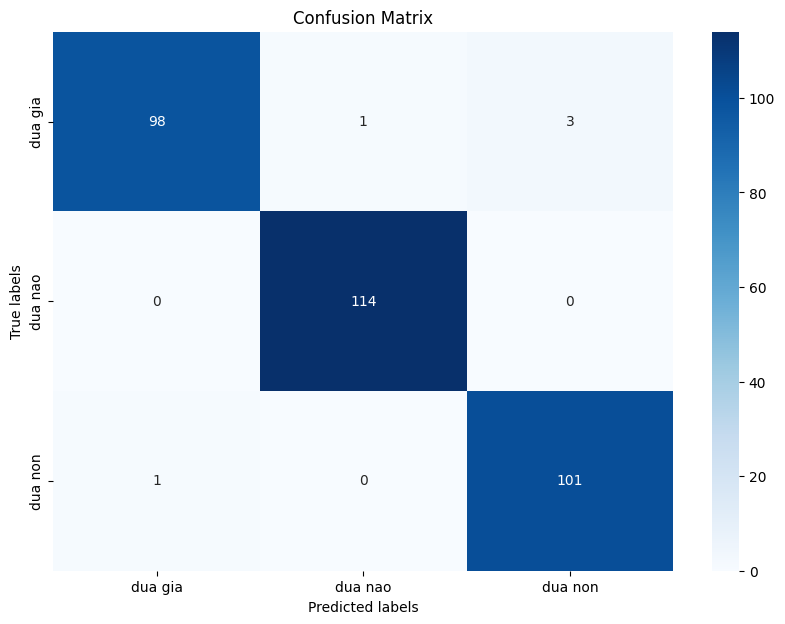

In [ ]:
model.to(DEVICE)
model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for data in TESTLOADER:
        inputs, labels = data
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().tolist())
        all_true_labels.extend(labels.cpu().tolist())


# Compute confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes_name, yticklabels=classes_name)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
f1 = f1_score(all_true_labels, all_predictions, average='weighted')
print("Weighted F1 Score:", f1)

Weighted F1 Score: 0.9842273190220311


In [ ]:
print(classification_report(all_true_labels, all_predictions, target_names=classes_name))

              precision    recall  f1-score   support

     dua gia       0.99      0.96      0.98       102
     dua nao       0.99      1.00      1.00       114
     dua non       0.97      0.99      0.98       102

    accuracy                           0.98       318
   macro avg       0.98      0.98      0.98       318
weighted avg       0.98      0.98      0.98       318



##5. Inference

In [ ]:
from PIL import Image

In [ ]:
model = models.densenet121(num_classes=3)
model.load_state_dict(torch.load("/content/drive/MyDrive/Coconut-Mature-Classification-Final/densenet121_model.pt"))
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
# Load your image and preprocess it
image_path = '/content/drive/MyDrive/Coconut-Mature-Classification-Final/test/dua nao/1049.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_data = preprocess(image).unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad():
    output = model(input_data)

# Post-process the output to get class probabilities
probabilities = torch.softmax(output, dim=1)

# Get the predicted class (class with the highest probability)
predicted_class = torch.argmax(probabilities, dim=1)

# Print or use the predicted class
print("Predicted Class:", predicted_class.item())

Predicted Class: 1


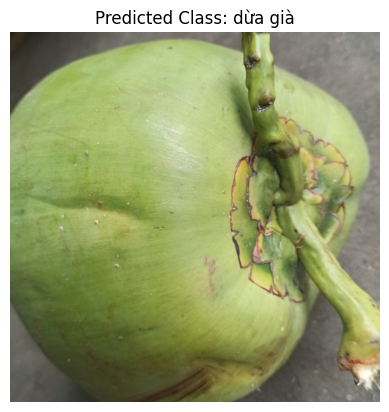

In [ ]:
import matplotlib.pyplot as plt

# Define a list of class names in the order they correspond to the model's output
class_names = ["dừa già", "dừa nạo", "dừa non"]

# Load your image and preprocess it
image_path = '/content/drive/MyDrive/Coconut-Mature-Classification-Final/test/dua gia/205.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_data = preprocess(image).unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad():
    output = model(input_data)

# Post-process the output to get class probabilities
probabilities = torch.softmax(output, dim=1)

# Get the predicted class (class with the highest probability)
predicted_class = torch.argmax(probabilities, dim=1)

# Use the predicted class to get the class name
predicted_class_index = predicted_class.item()
predicted_class_name = class_names[predicted_class_index]

# Display the image with the predicted class name
plt.imshow(image)
plt.title("Predicted Class: " + predicted_class_name)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

